In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [37]:
import numpy as np

In [17]:
df = pd.read_csv("../database/result.csv",parse_dates=["startDate"])

In [18]:
df["Duration"] = df["Hour"] * 60 + df["Minute"]
monthAbbreviation = {
    "01": "Jan",
    "02": "Feb",
    "03": "Mar",
    "04": "Apr",
    "05": "May",
    "06": "Jun",
    "07": "Jul",
    "08": "Aug",
    "09": "Sep",
    "10": "Oct",
    "11": "Nov",
    "12": "Dec"
}

In [19]:
Datewise = df.groupby(["startDate"]).sum().reset_index()
Datewise["labelDate"] = [str(i).split(" ")[0].split("-")[-1] +" " + monthAbbreviation[str(i).split(" ")[0].split("-")[-2]] for i in Datewise["startDate"]]

In [20]:
Datewise

,startDate,Hour,Minute,Duration,labelDate
0,2020-07-11,3,70,250,11 Jul
1,2020-07-12,1,200,260,12 Jul
2,2020-07-13,0,150,150,13 Jul
3,2020-07-14,0,65,65,14 Jul
4,2020-07-15,0,0,0,15 Jul
5,2020-07-16,1,140,200,16 Jul
6,2020-07-17,3,150,330,17 Jul
7,2020-07-18,1,147,207,18 Jul
8,2020-07-19,2,61,181,19 Jul
9,2020-07-20,1,60,120,20 Jul


In [21]:
Datewise = Datewise[["labelDate", "Duration"]]

In [23]:
Datewise["Change"] = Datewise["Duration"] - 300

In [25]:
Datewise["Changeby60"] = Datewise["Change"]/60

In [27]:
from math import e

In [31]:
Datewise["ePowerChangeby60"] = [e**i if i>0 else -e**(-i) for i in Datewise["Changeby60"]] 

In [33]:
L = Datewise["ePowerChangeby60"].tolist()

In [58]:
Datewise

,labelDate,Duration,Change,Changeby60,ePowerChangeby60
0,11 Jul,250,-50,-0.833333,-2.300976
1,12 Jul,260,-40,-0.666667,-1.947734
2,13 Jul,150,-150,-2.500000,-12.182494
3,14 Jul,65,-235,-3.916667,-50.232723
4,15 Jul,0,-300,-5.000000,-148.413159
5,16 Jul,200,-100,-1.666667,-5.294490
6,17 Jul,330,30,0.500000,1.648721
7,18 Jul,207,-93,-1.550000,-4.711470
8,19 Jul,181,-119,-1.983333,-7.266926
9,20 Jul,120,-180,-3.000000,-20.085537


-0.00
-0.00
-0.00
-0.01
-0.05
-0.07
-0.09
-0.11
-0.11
-0.12
-0.12
-0.13
-0.13
-0.13
-0.13
-0.13
-0.14
-0.15
-0.16
-0.16
-0.17
-0.17
-0.19


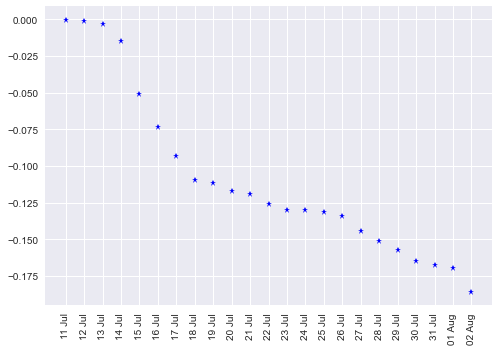

In [59]:
Version = []
_ver = 0.0
for i in range(len(L)):
    if(i>2):
        lastThree = L[i-1]+L[i-2]+L[i-3]
        _ver += (L[i]*2)/100 + (lastThree)/100
        Version.append(_ver/100)
    else:
        _ver += (L[i]*2)/100
        Version.append(_ver/100)
for i in Version:
    print("{:.2f}".format(i))
plt.plot(Datewise["labelDate"],Version,"b*")
plt.xticks(rotation = "vertical")
plt.show()